<a href="https://colab.research.google.com/github/dikshasa17/Netflix-Case-Study/blob/main/Business_Case_Netflix_Data_Exploration_and_Visualisation_Diksha_Saini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case: Netflix - Data Exploration and Visualisation**

* Netflix is one of the most popular media and video streaming platforms. They
have over 8000 movies or tv shows available on their platform, as of mid-2021,
they have over 200M Subscribers globally.
* The particular business case focuses on the Netflix show data and provides
insightful information on 8807 shows.
* Analyzing the data and generating insights helps Netflix decide which type of
shows/movies to produce and how to grow the business.


**Dataset:**       

The data is available in a single csv file :

* **Show ID:** The ID of the show

* **Type:** Identifier - A Movie or TV Show

* **Title:** Title of the Movie / Tv Show

* **Director:** Director of the Movie

* **Cast:** Actors involved in the movie/show

* **Country:** Country where the movie/show was produced

* **Date_added:** Date it was added on Netflix

* **Release_year:** Actual Release year of the movie/show

* **Rating:** TV Rating of the movie/show

* **Duration:** Total Duration - in minutes or number of seasons

* **Listed_in:** Genre

* **Description:** The summary description

**<ins>Dataset Link:</ins>**       
https://www.kaggle.com/shivamb/netflix-shows

# **Defining Problem Statement and Analysing basic metrics**
**Problem Statement:**

The objective of this project is to analyze the dataset of movies and TV shows available on **Netflix** and generate insights to help **Netflix** decide which type of content to produce and how to grow the business in different countries. The analysis should be data-driven, focusing on basic metrics and visualizations to support the findings. Netflix aims to optimize its content strategy by leveraging data-driven insights to enhance audience engagement, increase subscriptions, and expand its market presence globally.

 This analysis will help Netflix decide:

**Content Production Strategy:** Determine the types of content (e.g., movies, TV shows, genres) that resonate most with audiences globally and regionally.

**Market Expansion Opportunities:**Identify key countries where targeted content can drive business growth.

**Audience Preferences:** Understand viewer preferences across genres, release years, and ratings to align production and acquisition strategies with audience demand.

The analysis will include basic metrics and visualizations to uncover actionable insights that support Netflix's business goals of improving content quality, increasing market penetration, and enhancing customer satisfaction.

# **Import libraries and Load the dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load netflix.csv dataset into a pandas dataFrame
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

In [ ]:
# shows the top 5 records of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Data Exploration and Pre-processing**


## **Examine fundamental metrics and data types:**
Gaining insight into the dataset's structure, such as the number of rows and columns, as well as the data types of each attribute, is an essential part of the data exploration process.

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Observations:**

* The dataset comprises 8807 rows and 12 columns, providing a moderate-sized dataset for analysis.
* Columns like "show_id", "type", "title", "director", "cast", "country", "date_added", "rating", "duration", "listed_in", and "description" contain string values, represented using the "object" datatype. This suggests that the dataset primarily holds categorical and text-based information.
* The "release_year" column is the only one with an "integer" datatype, indicating that it stores numerical values, likely representing the year of release for the respective show or movie.
*Some columns may contain missing or null values, which could require imputation or removal based on the analysis needs.
*The "duration" column, while holding string values, may contain numerical data that can be extracted and converted for further analysis (e.g., movie runtime).
* It would be beneficial to check for any duplicate rows, especially in columns like "show_id", which could potentially act as a unique identifier for each entry.
* Some string-based columns, such as "cast" and "director", could have multiple values per entry, which might require additional processing or transformation for further analysis (e.g., splitting into separate rows or creating a list).

In [ ]:
## Describing the statistical summary of numerical type data
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**Insight**:

* The dataset spans a long time range, from 1925 to 2021, but most of the data is concentrated in the more recent years, with a peak around 2017–2019.
* The dataset includes both older content and very recent releases, with a median year of 2017, which is reflective of the evolving nature of content on streaming platforms or TV.
* The data suggests a diverse range of movie/show releases, which might reflect the growing variety in entertainment production over time.

## **Statistical Summary of Categorical type data**


In [ ]:
# Statistical summary of categorical type data
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


**Insights and Observations:**

* The dataset has a wide variety of shows and movies, with most entries being movies and single-season TV shows.
* The data covers a large number of directors and cast members, but some entries are missing this information.
* The dataset is globally diverse, with shows/movies from 748 unique countries and spanning a wide range of rating categories.
* The rating "TV-MA" is the most frequent, indicating that the dataset includes a lot of content meant for mature audiences.
* The duration column indicates a significant presence of single-season shows, which is common in streaming platforms.

## **Check for Missing Values**

Identifying and addressing missing values is a crucial data cleaning and data preprocessing step. Handling missing data falls under data cleaning, as it involves resolving issues with incomplete or unavailable information. The approach to managing missing values—whether through imputation (replacing missing values with estimates) or by removing affected rows or columns—depends on the extent and pattern of missing data.

Moreover, addressing missing values is also part of data preprocessing. If left unchecked, missing data can adversely impact the quality of analysis or machine learning models, leading to biased, inaccurate, or unreliable results. Ensuring that the dataset is free from missing values is essential for preparing the data for effective and meaningful analysis.








In [ ]:
# Display the count of missing values for each column
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
# Calculate the missing values percentage for each column and round to two decimal places
missing_values_percentage = (df.isnull().mean() * 100).round(2)

# Display the missing values percentage for each column
print("Missing Values Percentage:\n")
print(missing_values_percentage)

Missing Values Percentage:

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64


**Summary and Recommendations:**

* **Columns with no missing values:** show_id, type, title, release_year, listed_in, description (these can be used confidently for analysis without needing imputation).
* **Columns with minor missing values:** rating, duration, date_added (these can be imputed with common values or left as is due to their low impact on the dataset).
* **Columns with significant missing values:** director, cast, and country (for these, the missing values are more substantial, and you'll need to decide whether to impute based on other factors or remove rows with missing data depending on their importance to your analysis).

**Observation and Plan for Handling Missing Values:**

* **director Column (30% Missing Values):**
Since a significant portion of the director column data is missing, it wouldn't be ideal to drop these rows. Instead, you can fill the missing values with "Unknown", which is a reasonable placeholder for missing data in this context.

-- Action: Impute missing director values with "Unknown".


* **cast and country Columns (Around 10% Missing Values):**
Both the cast and country columns have roughly 10% missing values. While this is a noticeable portion, it is still manageable depending on your analysis needs.

-- Action: You can either:
Impute the missing values with "Unknown" (for categorical data like cast and country).
Or, if the missing values in these columns are not critical for your analysis, you could leave them as is or remove the rows with missing data.

* Given the nature of these columns, imputing with "Unknown" is a good strategy for maintaining the integrity of the dataset while avoiding significant data loss.


# **Basic Analysis**

## **Handling null values**



### **a)** For **categorical variables** with null values, update those rows as unknown_column_name.

* Example : Replace missing value with Unknown Actor for missing value in
Actors column.

In [ ]:
# Handling null values for categorical variables
categorical_columns = ['cast', 'director', 'country', 'rating']
for column in categorical_columns:
    df[column].fillna('Unknown_' + column, inplace=True)

<ipython-input-469-3fb7bdd7f219>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna('Unknown_' + column, inplace=True)


### **b)** Replace with 0 for **continuous variables** having null values.

In [ ]:
# Handling null values for continuous variables
continuous_columns = ['duration']
for column in continuous_columns:
    df[column].fillna(0, inplace=True)

<ipython-input-470-308fed85440b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(0, inplace=True)


In [ ]:
# Display the count of missing values for each column
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,0
duration,0


**Observation:**

* We see that we still have few **missing values** in "date_added" column. We will drop these rows in which "date_added" values are missing when we will do the analysis related to date column.

## **Unnesting Columns**

In data preprocessing, "unnesting" involves transforming nested data into a flat or simplified format. This process is essential when working with data that includes lists, arrays, or other complex structures within a single column. Unnesting helps to break down hierarchical data into a more accessible, tabular format for easier analysis.

In [ ]:
#Original Data
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown_director,Unknown_cast,Unknown_country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [ ]:
# Using Direct Assignment and explode

# Unnesting "cast" column
df['cast'] = df['cast'].str.split(', ')
df = df.explode('cast')

# Unnesting "director" column
df['director'] = df['director'].str.split(', ')
df = df.explode('director')

# Unnesting "country" column
df['country'] = df['country'].str.split(', ')
df = df.explode('country')

# Now, the "cast," "director," & "country" columns are unnested, & each row contains a single element in those columns...

In [ ]:
#New Data:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown_director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


**Observation:**
   
* The "cast", "director", and "country" columns has been unnested due to which we now have a total number of **89382 rows with 12 columns** in this dataframe.

## **Convert categorical attributes to 'category' data type**

Converting categorical attributes to the 'category' data type is a **data preprocessing** step. By doing so, you are optimizing the memory usage and potentially speeding up certain operations when dealing with categorical data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89382 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       89382 non-null  object
 1   type          89382 non-null  object
 2   title         89382 non-null  object
 3   director      89382 non-null  object
 4   cast          89382 non-null  object
 5   country       89382 non-null  object
 6   date_added    89313 non-null  object
 7   release_year  89382 non-null  int64 
 8   rating        89382 non-null  object
 9   duration      89382 non-null  object
 10  listed_in     89382 non-null  object
 11  description   89382 non-null  object
dtypes: int64(1), object(11)
memory usage: 8.9+ MB


In [ ]:
# Converting the columns 'type', 'country', and 'rating' in the dataframe 'df' to the 'category' data type
df['type'] = df['type'].astype('category')
df['country'] = df['country'].astype('category')
df['rating'] = df['rating'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89382 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       89382 non-null  object  
 1   type          89382 non-null  category
 2   title         89382 non-null  object  
 3   director      89382 non-null  object  
 4   cast          89382 non-null  object  
 5   country       89382 non-null  category
 6   date_added    89313 non-null  object  
 7   release_year  89382 non-null  int64   
 8   rating        89382 non-null  category
 9   duration      89382 non-null  object  
 10  listed_in     89382 non-null  object  
 11  description   89382 non-null  object  
dtypes: category(3), int64(1), object(8)
memory usage: 7.2+ MB


**Observation:**
   
* The "type", "country", "rating" columns datatype has been corrected to **"Category"** in this dataframe.
* The column "release_year" seem to be having the **"integer**" datatype
* Rest of the columns contain string values, which are represented using the **"object"** datatype in this dataframe.

## **Convert date and time attributes to 'date_time' data type**

Converting date and time attributes to the 'date_time' data type is a **data preprocessing** step.

In [ ]:
# Remove any leading/trailing whitespace characters
df['date_added'] = df['date_added'].str.strip()

# Convert 'date_added' column to datetime data type
df['date_added'] = pd.to_datetime(df['date_added'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89382 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       89382 non-null  object        
 1   type          89382 non-null  category      
 2   title         89382 non-null  object        
 3   director      89382 non-null  object        
 4   cast          89382 non-null  object        
 5   country       89382 non-null  category      
 6   date_added    89313 non-null  datetime64[ns]
 7   release_year  89382 non-null  int64         
 8   rating        89382 non-null  category      
 9   duration      89382 non-null  object        
 10  listed_in     89382 non-null  object        
 11  description   89382 non-null  object        
dtypes: category(3), datetime64[ns](1), int64(1), object(7)
memory usage: 7.2+ MB


**Observation:**
  
* The "date_added" column's datatype has been updated to the right **"date_time**" format in this dataframe.
* The "type", "country", "rating" columns datatype has been corrected to **"Category"**.
* The column "release_year" seem to be having the **"integer**" datatype
* Rest of the columns contain string values, which are represented using the **"object"** datatype in this dataframe.

## **Convert numeric attributes to 'int' data type**

Converting numeric attributes to the 'integer' data type is a **data preprocessing** step.

In [ ]:
# Custom function to convert duration to numeric
def convert_duration(duration):
    if 'Season' in str(duration):
        return int(str(duration).split()[0])  # Extract the numeric value for 'Seasons'
    return int(str(duration).replace(' min', ''))  # Convert 'min' entries to integers

# Convert 'duration' column to numeric using the custom function
df['duration'] = df['duration'].apply(convert_duration)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89382 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       89382 non-null  object        
 1   type          89382 non-null  category      
 2   title         89382 non-null  object        
 3   director      89382 non-null  object        
 4   cast          89382 non-null  object        
 5   country       89382 non-null  category      
 6   date_added    89313 non-null  datetime64[ns]
 7   release_year  89382 non-null  int64         
 8   rating        89382 non-null  category      
 9   duration      89382 non-null  int64         
 10  listed_in     89382 non-null  object        
 11  description   89382 non-null  object        
dtypes: category(3), datetime64[ns](1), int64(2), object(6)
memory usage: 7.2+ MB


# **Data Analysis**

## **Find the counts of each categorical variable both using graphical and nongraphical analysis.**



In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown_director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown_director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


### **For Non-graphical Analysis:**

  **Non-graphical analysis** refers to the exploration and examination of data without using visualizations. In the contect, we loop through each categorical column and use the **value_counts()** method to get the counts of each category in that column. Additionally, we use the **unique()** method to get the unique attributes for each categorical column.
  
       Hint : We want you to find the values counts of each category for the given column

In [ ]:
# Categorical variables to analyze
categorical_columns = ['type', 'rating']

# Non-graphical analysis (value counts of each category for the given column)
#Loop through each categorical column to display the counts of each category
for column in categorical_columns:
    print(f"Column: {column}\n")
    print(df[column].value_counts(), "\n")
    print(f"Unique Values: {df[column].unique()}")
    print("\n" + "="*100 + "\n")  # Separate the output for different columns


Column: type

type
Movie      65346
TV Show    24036
Name: count, dtype: int64 

Unique Values: ['Movie', 'TV Show']
Categories (2, object): ['Movie', 'TV Show']


Column: rating

rating
TV-MA             29860
TV-14             17437
R                 12865
PG-13              7814
TV-PG              6356
PG                 5182
TV-Y7              4073
TV-Y               2745
TV-G               1329
G                   878
NR                  676
NC-17                55
TV-Y7-FV             39
Unknown_rating       38
UR                   32
74 min                1
84 min                1
66 min                1
Name: count, dtype: int64 

Unique Values: ['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', ..., '66 min', 'NR', 'Unknown_rating', 'TV-Y7-FV', 'UR']
Length: 18
Categories (18, object): ['66 min', '74 min', '84 min', 'G', ..., 'TV-Y7', 'TV-Y7-FV', 'UR',
                          'Unknown_rating']




### **For graphical analysis:**

In **Graphical Analysis**, we loop through each **categorical column** and creating a count plot using **seaborn's countplot()** function. Each count plot visually displays the counts of each category in a **bar chart**, showing the distribution of categorical data in the DataFrame.
       
       Hint : We can use a count plot to get the counts of each category



In [ ]:
# Categorical variables to analyze graphically
categorical_columns = ['type', 'rating']

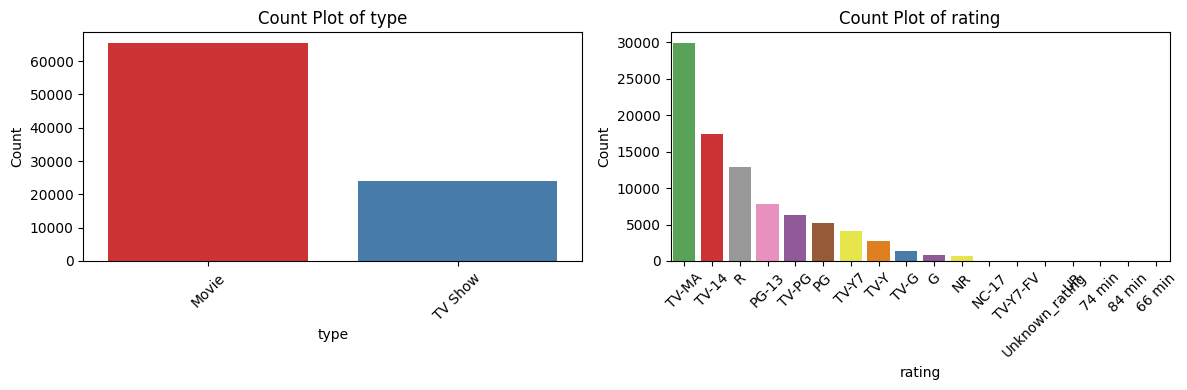

In [ ]:
# Create subplots for graphical analysis
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(12, 4))

# Graphical analysis for each categorical variable
for i, column in enumerate(categorical_columns):
    unique_count = df[column].nunique()  # Count unique values in the column
    palette = sns.color_palette('Set1', n_colors=unique_count)  # Create a palette matching unique values

    sns.countplot(
        data=df,
        x=column,
        order=df[column].value_counts().index,
        ax=axes[i],
        hue=column,
        palette=palette,
        dodge=False # Apply the dynamically generated palette
    )

    axes[i].set_title(f'Count Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Observations:**

* The **count plot** for the **'type'** variable shows that there are two types of content: **'Movie'** and **'TV Show'**. It appears that the dataset contains **more movies than TV shows**.
* As per the **'rating' Count Plot**, we can see the distribution of different content ratings. The **most common rating** seems to be 'TV-MA', followed by 'TV-14' and 'R'. There are also several other ratings with varying frequencies.

**Actionable Recommendations:**

* **Content Balance:** As there are **more movies than TV shows** in the dataset, content creators could **focus on producing a balanced mix of both types** to cater to **diverse audience preferences**.
* **Targeting Different Age Groups:** Considering that **'TV-MA' and 'TV-14**' are the **most common content ratings**, it suggests that the audience for **Netflix** content primarily consists of adults and teenagers. However, there is still a significant viewership for other ratings as well. To cater to a broader audience, producing **content for different age groups** (e.g., children-friendly shows, family-oriented content) could be beneficial.

## **2. Comparison of TV Shows vs Movies.**



### **Find the number of Movies produced in each country and pick the top 10 countries.**
       
       Hint : We want you to apply group by each country and find the count of unique titles of Movies



In [ ]:
# Filter the dataset to include only movies
movies_df = df[df['type'] == 'Movie']

# Group by 'country' and count the number of unique movie titles
movie_counts_by_country = movies_df.groupby('country',observed=True)['title'].nunique().reset_index()
movie_counts_by_country = movie_counts_by_country.sort_values(by='title', ascending=False)

# Select top 10 countries with the most movies
top_10_movie_countries = movie_counts_by_country.head(10)
print("Top 10 countries with the most Movies:\n")
print(top_10_movie_countries)


Top 10 countries with the most Movies:

             country  title
114    United States   2751
43             India    962
112   United Kingdom    532
116  Unknown_country    440
20            Canada    319
34            France    303
36           Germany    182
100            Spain    171
51             Japan    119
23             China    114


### **Find the number of TV-Shows produced in each country and pick the top 10 countries.**
       
       Hint : We want you to apply group by each country and find the count of unique titles of TV-Shows



In [ ]:
# Filter the dataset to include only TV shows
tv_shows_df = df[df['type'] == 'TV Show']

# Group by 'country' and count the number of unique TV show titles
tv_show_counts_by_country = tv_shows_df.groupby('country', observed=True)['title'].nunique().reset_index()
tv_show_counts_by_country = tv_show_counts_by_country.sort_values(by='title', ascending=False)

# Select top 10 countries with the most TV shows
top_10_tv_show_countries = tv_show_counts_by_country.head(10)
print("Top 10 countries with the most TV shows:\n")
print(top_10_tv_show_countries)



Top 10 countries with the most TV shows:

            country  title
63    United States    938
64  Unknown_country    391
62   United Kingdom    272
30            Japan    199
52      South Korea    170
8            Canada    126
19           France     90
25            India     84
57           Taiwan     70
2         Australia     66


### **Graphical Representation**
Visualize the comparison between the top 10 countries for Movies and TV Shows

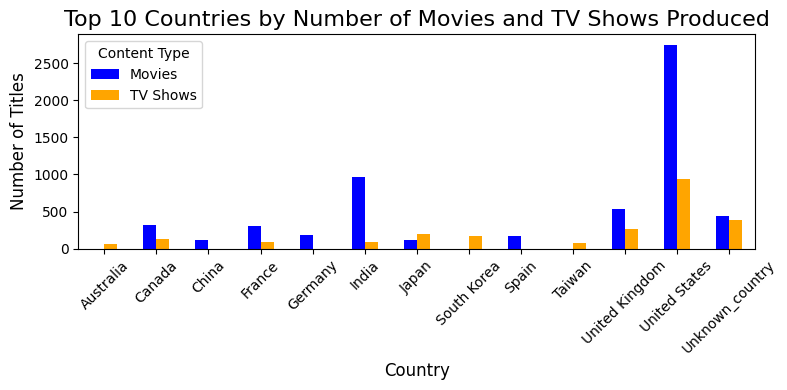

In [ ]:
# Top 10 countries for Movies (using the previously calculated movie count)
top_10_movies = movies_df.groupby('country', observed=True)['title'].nunique().sort_values(ascending=False).head(10)

# Top 10 countries for TV Shows (using the previously calculated TV show count)
top_10_tv_shows = tv_shows_df.groupby('country', observed=True)['title'].nunique().sort_values(ascending=False).head(10)

# Combine the two series into a single dataframe for easier plotting
comparison_df = pd.DataFrame({
    'Movies': top_10_movies,
    'TV Shows': top_10_tv_shows
}).fillna(0)  # Fill NaN values with 0 (some countries may not have both movies and TV shows)

# Create a bar plot for comparison
comparison_df.plot(kind='bar', figsize=(8, 4), color=['blue', 'orange'])

# Add labels and title
plt.title('Top 10 Countries by Number of Movies and TV Shows Produced', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Content Type')

# Show the plot
plt.tight_layout()
plt.show()


**Insights on TV Shows vs. Movies Production by Country**

After analyzing the data and visualizing the top countries for the production of Movies and TV Shows, here are some key insights:

**Movies Production Insights**

* **Dominant Movie Producers:** The data reveals that certain countries, notably the **United States and India**, are leading producers of movies. These countries consistently top the chart, indicating a strong film industry presence.

* **Diverse Movie Production:** The top 10 countries for movie production exhibit a global diversity, including countries from different continents. This suggests that the movie industry is widespread and not concentrated in just a few regions.

* **Production Focus:** Some countries, like the United States, have a massive volume of movie production, hinting at a higher investment and audience demand for movies in these regions. Countries in Europe or Asia also contribute significantly but with different genres or cultural focuses.


**TV Shows Production Insights**

* **TV Show Leaders:** Countries such as the United States, United Kingdom, and South Korea typically dominate in TV show production, indicating a well-developed television industry with a strong global appeal.

* **Popular TV Show Markets:** Many countries in the top 10 list for TV show production have a global influence. For instance, South Korean TV shows have gained significant international popularity, highlighting the rising global interest in non-Western TV content.

* **Growth of Non-English Content:** An increase in TV show production in non-English speaking countries (like South Korea and Japan) indicates a growing global appetite for diverse content, including subtitled and dubbed shows.



**General Insights**

* **Movie vs. TV Show Dominance:** In countries like the United States and India, movies tend to dominate over TV shows, reflecting the strong movie-going culture and the cinematic tradition in these regions. On the other hand, countries like South Korea have a more balanced production between movies and TV shows, indicating versatility.

* **Impact of Streaming Platforms:** The rise of streaming services may have influenced the production trends. Countries with high TV show production are likely tapping into the streaming platform demands, where binge-watching serialized content has become popular.

* **Cultural Influence:** The content produced in the top countries reflects their cultural priorities and the local audience's preferences. Countries that dominate both TV and movie production (like the US) are often cultural trendsetters, impacting global media consumption.

* **Shift in Viewing Preferences:** A higher number of TV shows in certain regions may indicate a shift from traditional cinema to serialized storytelling, as audiences look for deeper narratives and character development over longer formats.



## **What is the best time to launch a TV show?**



### **Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies**
       
       Hint : We expect you to create a new column and group by each week and count the total number of movies/ tv shows.



In [ ]:
# Extract week from the 'date_added' column and create a new column 'release_week'
df['week'] = df['date_added'].dt.isocalendar().week

# Separate the TV Shows and Movies
tv_shows_df = df[df['type'] == 'TV Show']
movies_df = df[df['type'] == 'Movie']

# Group by week for TV Shows and Movies and count the number of titles
tv_shows_by_week = tv_shows_df.groupby('week')['title'].count()
movies_by_week = movies_df.groupby('week')['title'].count()

# Best week for TV Shows and Movies
best_week_tv_shows = tv_shows_by_week.idxmax()
best_week_movies = movies_by_week.idxmax()
print('_'*50,'\n')
print(f"Best week to release TV Shows: Week {best_week_tv_shows}")
print(f"Best week to release Movies: Week {best_week_movies}")
print('_'*50,'\n')

__________________________________________________ 

Best week to release TV Shows: Week 35
Best week to release Movies: Week 1
__________________________________________________ 



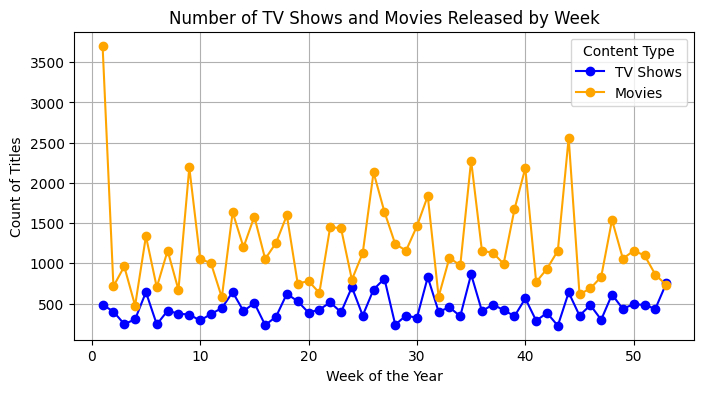

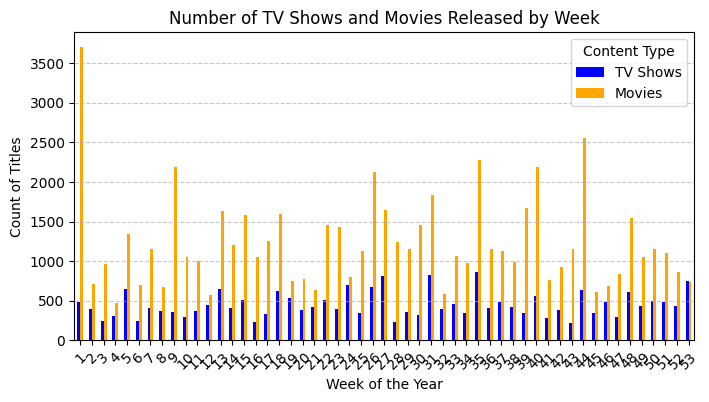

In [ ]:
# Graphical respresntation:
# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(tv_shows_by_week.index, tv_shows_by_week.values, label='TV Shows', color='blue', marker='o')
plt.plot(movies_by_week.index, movies_by_week.values, label='Movies', color='orange', marker='o')
plt.title('Number of TV Shows and Movies Released by Week')
plt.xlabel('Week of the Year')
plt.ylabel('Count of Titles')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

# Bar graph
# Combine the TV shows and movies by week into a single DataFrame
combined_weekly = pd.DataFrame({
    'TV Shows': tv_shows_by_week,
    'Movies': movies_by_week
}).fillna(0)  # Filling missing values with 0 for weeks with no releases

# Plotting the combined bar graph
combined_weekly.plot(kind='bar', figsize=(8, 4), color=['blue', 'orange'])
plt.title('Number of TV Shows and Movies Released by Week')
plt.xlabel('Week of the Year')
plt.ylabel('Count of Titles')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insights for Best Time to Launch TV Shows and Movies:**

**a) Best Week to Release TV Shows and Movies**

**TV Shows:**

* The best week to release TV shows is the week with the highest count of releases **(Week 35)**. This indicates when TV shows tend to receive maximum attention, potentially due to reduced competition from other shows or the availability of a larger audience.
* This week could align with holidays, events, or certain times of the year when viewers have more free time, making it ideal for TV show launches.

**Movies:**

* Similarly, movies have a peak week for releases **(Week 1)**, which can be linked to industry patterns such as award seasons, school holidays, or public holidays.
* The week with the highest number of movie releases suggests an optimal time when audiences are more likely to visit theaters or stream content.


### **Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies.**
       
       Hint : We expect you to create a new column and group by each month and count the total number of movies/ tv shows.



In [ ]:
# Extract month from the 'date_added' column and create a new column 'month'
df['month'] = df['date_added'].dt.month

# Separate the TV Shows and Movies
tv_shows_df = df[df['type'] == 'TV Show']
movies_df = df[df['type'] == 'Movie']

# Group by month for TV Shows and Movies and count the number of titles
tv_shows_by_month = tv_shows_df.groupby('month')['title'].count()
movies_by_month = movies_df.groupby('month')['title'].count()

# Best month for TV Shows and Movies
best_month_tv_shows = tv_shows_by_month.idxmax()
best_month_movies = movies_by_month.idxmax()
print('_'*50,'\n')
print(f"Best month to release TV Shows: Month {best_month_tv_shows}")
print(f"Best month to release Movies: Month {best_month_movies}")
print('_'*50,'\n')


__________________________________________________ 

Best month to release TV Shows: Month 8.0
Best month to release Movies: Month 7.0
__________________________________________________ 



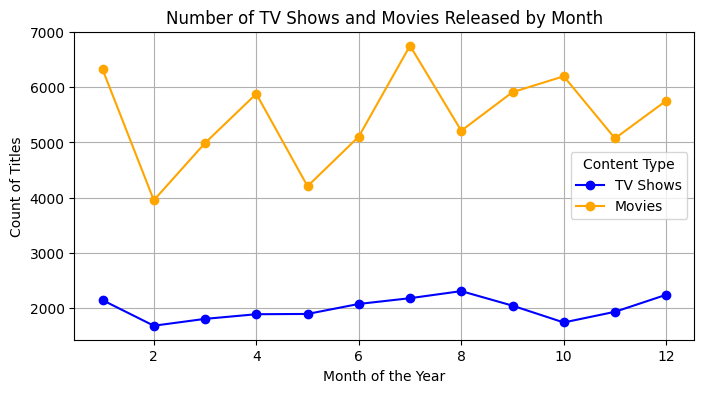

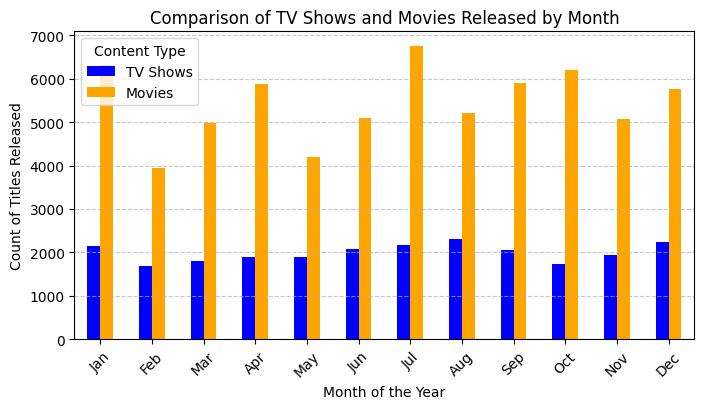

In [ ]:
# Graphical respresntation:
# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(tv_shows_by_month.index, tv_shows_by_month.values, label='TV Shows', color='blue', marker='o')
plt.plot(movies_by_month.index, movies_by_month.values, label='Movies', color='orange', marker='o')
plt.title('Number of TV Shows and Movies Released by Month')
plt.xlabel('Month of the Year')
plt.ylabel('Count of Titles')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

# Bar graph
# Combine the TV shows and movies by month into a single DataFrame
combined_monthly = pd.DataFrame({
    'TV Shows': tv_shows_by_month,
    'Movies': movies_by_month
}).fillna(0)  # Filling missing values with 0 for months with no releases

# Plotting the combined bar graph
combined_monthly.plot(kind='bar', figsize=(8, 4), color=['blue', 'orange'])
plt.title('Comparison of TV Shows and Movies Released by Month')
plt.xlabel('Month of the Year')
plt.ylabel('Count of Titles Released')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Content Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insights for Best Time to Launch TV Shows and Movies:**

 **b) Best Month to Release TV Shows and Movies**

**TV Shows:**

* The month with the highest number of TV show **(Month 8)** releases provides an indication of the most competitive period for TV content. It can also highlight the month when viewership peaks, and when the industry targets its audience the most.
* Knowing this month can help creators avoid periods with heavy competition, or alternatively, it can signal a month when launching a new show might lead to more exposure.

**Movies:**

* The movie industry also has peak months **(Month 7)** for releasing content. These months could be linked to seasonal trends (e.g., summer blockbusters, holiday-themed releases, or year-end releases for awards season).
* Understanding these patterns can assist filmmakers and streaming platforms in planning their releases to coincide with months where movie-watching demand is higher.



In [ ]:
# Added week and month column in the dataframe.
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",38,9.0
1,s2,TV Show,Blood & Water,Unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38,9.0
1,s2,TV Show,Blood & Water,Unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38,9.0
1,s2,TV Show,Blood & Water,Unknown_director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38,9.0
1,s2,TV Show,Blood & Water,Unknown_director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38,9.0


**Observations:**

Based on the **bar plots** and **point plots**, we can make the following observations:

* The code identifies the **week with the highest number of TV show releases**, labeled as **"best_week"**. This **week** is displayed in both the **bar plot** and **point plot** for **TV shows released by week**.
* The code also identifies the **month with the highest number of TV show releases**, labeled as **"best_month"**. This **month** is displayed in both the **bar plot** and **point plot** for **TV shows released by month**.

**Actionable Recommendations:**

* **High Activity Period:** The identified **"best_week"** and **"best_month"** represent **periods of high activity** in terms of **TV show releases**. To capitalize on this, content creators and **Netflix** can plan to **launch their new TV shows during these weeks or months** to gain **maximum visibility and viewership**.
* **Seasonal Trends:** Analyzing the **TV show releases by month** can help identify potential **seasonal trends**. Content creators can align TV shows with specific themes or genres to match **seasonal preferences**, increasing the chances of success.
* **Avoiding Competitive Periods:** While launching TV shows during high activity periods is beneficial, it's essential to **avoid periods** when numerous popular TV shows are already being released. Competition can reduce visibility and affect viewership. Therefore, content creators can **strategize the release dates** to **avoid clashes with major TV show premieres**.


## **Analysis of actors/directors of different types of shows/movies.**

To analyze the **top 10 actors and directors** who have **appeared** in the **most movies or TV shows**, we will group the data by each actor and director separately and then count the number of unique titles (TV shows/movies) associated with each of them. We will create two separate bar plots to visualize the results.

### **Identify the top 10 Actors who have appeared in most movies or TV shows.**
       
       Hint : We want you to group by each actor and find the count of unique titles of Tv-shows/movies.



In [ ]:
# Filter out rows with 'unknown' cast
df_movies = df[df['type'] == 'Movie']
df_movies = df_movies[df_movies['cast'] != 'Unknown_cast']

# Grouping the data by actors and counting the number of unique movie titles for each actor
actor_movie_counts = df_movies.groupby('cast')['title'].nunique().reset_index()

# Sorting the actors in descending order of movie counts and selecting the top 10
top_10_actors_movies = actor_movie_counts.sort_values(by='title', ascending=False).head(10)
top_10_actors_movies

,cast,title
2105,Anupam Kher,42
21781,Shah Rukh Khan,35
17193,Naseeruddin Shah,32
638,Akshay Kumar,30
18064,Om Puri,30
18329,Paresh Rawal,28
1313,Amitabh Bachchan,28
12031,Julie Tejwani,28
3354,Boman Irani,27
20692,Rupa Bhimani,27


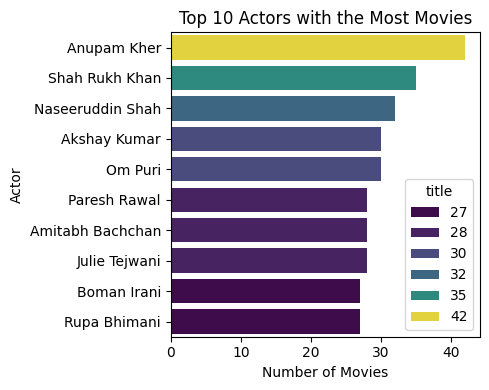

In [ ]:
# Create a subplot for the top 10 actors with the most movies
plt.figure(figsize=(5, 4))
sns.barplot(data=top_10_actors_movies, x='title', y='cast',hue='title', dodge=False, palette='viridis')
plt.title('Top 10 Actors with the Most Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
# For actors who have appeared in the most TV shows:
# Filter out rows with 'unknown' cast
df_tv_shows = df[df['type'] == 'TV Show']
df_tv_shows = df_tv_shows[df_tv_shows['cast'] != 'Unknown_cast']

# Grouping the data by actors and counting the number of unique TV show titles for each actor
actor_tv_show_counts = df_tv_shows.groupby('cast')['title'].nunique().reset_index()

# Sorting the actors in descending order of TV show counts and selecting the top 10
top_10_actors_tv_shows = actor_tv_show_counts.sort_values(by='title', ascending=False).head(10)
top_10_actors_tv_shows

,cast,title
13230,Takahiro Sakurai,25
14580,Yuki Kaji,19
6804,Junichi Suwabe,17
2874,Daisuke Ono,17
252,Ai Kayano,17
14564,Yuichi Nakamura,16
14496,Yoshimasa Hosoya,15
6761,Jun Fukuyama,15
3127,David Attenborough,14
6918,Kana Hanazawa,13


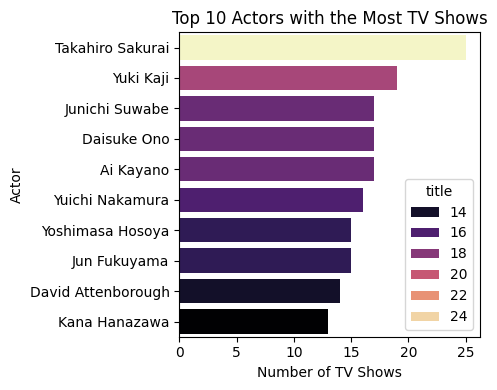

In [ ]:
# Create a subplot for the top 10 actors with the most TV shows
plt.figure(figsize=(5, 4))
sns.barplot(data=top_10_actors_tv_shows, x='title', y='cast',hue='title', dodge=False, palette='magma')
plt.title('Top 10 Actors with the Most TV Shows')
plt.xlabel('Number of TV Shows')
plt.ylabel('Actor')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

**Observations:**

Based on the **bar plots** for **actors** , we can make the following observations.

* **Top 10 Actors with the Most Movies:** We can see that the actor **"Anupam Kher"** with the **most movie appearances** is shown at the top of the plot along with the color palette 'viridis' which is used to differentiate the bars of camparision with other actors.
* **Top 10 Actors with the Most TV Shows:** The actor **"Takahiro Sakurai"** with the **most TV show appearances** is shown at the top of the plot. The color palette 'magma' is used to differentiate the bars.

### **Identify the top 10 directors who have appeared in most movies or TV shows.**
       
       Hint : We want you to group by each director and find the count of unique titles of Tv-shows/movies



In [ ]:
# Filter out rows with 'unknown' directors
df_movies = df[df['type'] == 'Movie']
df_movies = df_movies[df_movies['director'] != 'Unknown_director']

# Grouping the data by directors and counting the number of unique movie titles for each director
director_movie_counts = df_movies.groupby('director')['title'].nunique().reset_index()

# Sorting the directors in descending order of movie counts and selecting the top 10
top_10_directors_movies = director_movie_counts.sort_values(by='title', ascending=False).head(10)
top_10_directors_movies

,director,title
3582,Rajiv Chilaka,22
1817,Jan Suter,21
3633,Raúl Campos,19
4261,Suhas Kadav,16
2739,Marcus Raboy,15
1862,Jay Karas,15
727,Cathy Garcia-Molina,13
1859,Jay Chapman,12
2815,Martin Scorsese,12
4725,Youssef Chahine,12


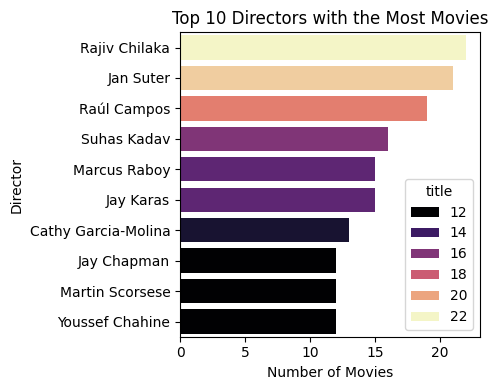

In [ ]:
# Create a subplot for the top 10 directors with the most movies
plt.figure(figsize=(5, 4))
sns.barplot(data=top_10_directors_movies, x='title', y='director',hue='title', dodge=False, palette='magma')
plt.title('Top 10 Directors with the Most Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
# For directors who have appeared in the most TV shows:
# Filter out rows with 'unknown' directors
df_tv_shows = df[df['type'] == 'TV Show']
df_tv_shows = df_tv_shows[df_tv_shows['director'] != 'Unknown_director']

# Grouping the data by directors and counting the number of unique TV show titles for each director
director_tv_show_counts = df_tv_shows.groupby('director')['title'].nunique().reset_index()

# Sorting the directors in descending order of TV show counts and selecting the top 10
top_10_directors_tv_shows = director_tv_show_counts.sort_values(by='title', ascending=False).head(10)

In [ ]:
top_10_directors_tv_shows

,director,title
146,Ken Burns,3
8,Alastair Fothergill,3
259,Stan Lathan,2
140,Jung-ah Im,2
128,Joe Berlinger,2
100,Hsu Fu-chun,2
84,Gautham Vasudev Menon,2
168,Lynn Novick,2
103,Iginio Straffi,2
251,Shin Won-ho,2


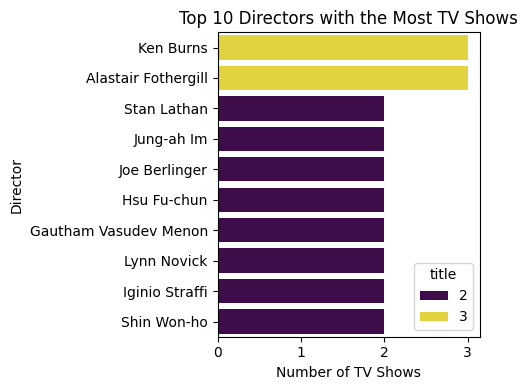

In [ ]:
# Create a subplot for the top 10 directors with the most TV shows
plt.figure(figsize=(5, 4))
sns.barplot(data=top_10_directors_tv_shows, x='title', y='director',hue='title', dodge=False, palette='viridis')
plt.title('Top 10 Directors with the Most TV Shows')
plt.xlabel('Number of TV Shows')
plt.ylabel('Director')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

**Observations:**

Based on the **bar plots** for **directors** , we can make the following observations.

* **Top 10 Directors with the Most Movies:** The director with the **most movie appearances** is **"Rajiv Chilaka"** as shown at the top of the plot along with the color palette 'magma' which is used to differentiate the bars.
* **Top 10 Directors with the Most TV Shows:** Likewise, **"Ken Burns"** is the directors listed with the **most TV show appearances** is shown at the top of the plot. The color palette 'viridis' is used to differentiate the bars.

**Actionable Recommendation for Actors & Directors:**

* **Leveraging Popular Actors & Directors:** Based on the analysis of **top actors & directors** with the **most movie and TV show appearances**, **Netflix** can consider **collaborations and partnerships with popular actors** or with **collaborating with top directors** to attract a broader audience. Including well-known actors or directors in original productions can lead to increased viewership.
* **Content Curation:** **Netflix** can curate **special collections featuring movies and TV shows** starring the **top actors and directed by the top directors**. This curated content can be promoted to subscribers based on their viewing preferences and history.

## **Which genre movies are more popular or produced more**

```
Hint : We want you to apply the word cloud on the genre columns to know which kind of genre is produced
```

* To identify which **genre** of **movies** is **more popular or produced mor**e, we can create a **word cloud** to visualize the frequency of different genres in the dataset. A **word cloud** is a **graphical representation of word frequencies, where the size of each word corresponds to its frequency** in the dataset.



In [ ]:
from wordcloud import WordCloud

In [ ]:
# Combine all the genres into a single string
movie_genre = df[df['type'] == 'Movie']
text = ' '.join(movie_genre['listed_in'])

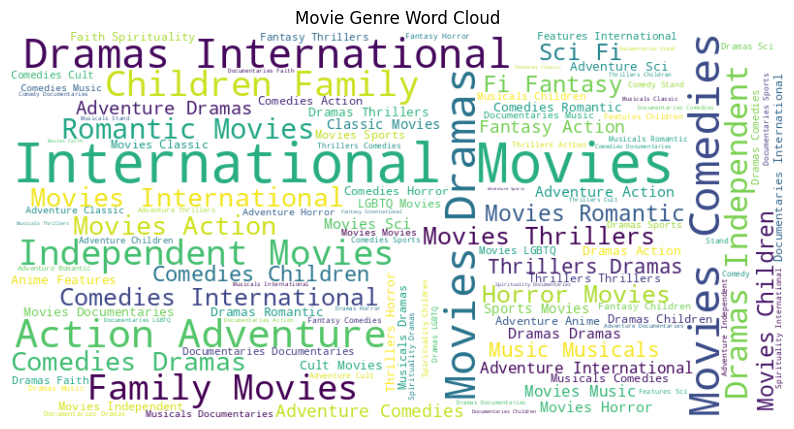

In [ ]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Movie Genre Word Cloud')
plt.axis('off')
plt.show()

**Observation:**

* The provided code creates a **word cloud** visualization based on the **movie genres** available in the **Netflix** dataset. A **word cloud** here represents the **popularity or frequency of different movie genres**.

**Actionable Recommendations:**

* **Content Curation:** In this case we can see that dramas, actions, adventure, comedies and family movies are some of the most popular genres world wide. Hence, understanding the **most popular genres** can guide **Netflix** in curating their content to cater to **diverse audience preferences**.

## **Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)**

```
Hint : We want you to get the difference between the columns having date added information and release year information and
get the mode of difference.
This will give an insight into what will be the better time to add in Netflix
```
* **Mode of the Difference:** The mode of the number of days tells us the most frequent number of days it takes for movies to be added to Netflix after their release. This can give us insight into the timing of adding content to Netflix.


In [ ]:
# Filter the dataset to consider only Movies and create a copy to avoid the warning
movies_df = df[df['type'] == 'Movie'].copy()

# Calculate the release date using the release year
movies_df.loc[:, 'release_date'] = pd.to_datetime(movies_df['release_year'].astype(str) + '-01-01', errors='coerce')

# Calculate the difference in days between when the movie was released and when it was added to Netflix
movies_df.loc[:, 'days_to_add'] = (movies_df['date_added'] - movies_df['release_date']).dt.days

# Drop rows with missing 'days_to_add' values (if any)
movies_df = movies_df.dropna(subset=['days_to_add'])

# Get the mode (most common difference in days)
mode_days_to_add = movies_df['days_to_add'].mode()[0]

print('-'*100)
print(f"The mode (most common wait time) for movies to be added to Netflix is approximately {mode_days_to_add} days.")
print('-'*100)

----------------------------------------------------------------------------------------------------
The mode (most common wait time) for movies to be added to Netflix is approximately 2289 days.
----------------------------------------------------------------------------------------------------


In [ ]:
movies_df.head(4)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week,month,release_date,days_to_add
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",38,9.0,2020-01-01,633
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown_country,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,9.0,2021-01-01,266
6,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,Vanessa Hudgens,Unknown_country,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,9.0,2021-01-01,266
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,Unknown_country,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,9.0,2021-01-01,266


**Insights:**

* **Average Conversion:** If mode_days_to_add is around **2289 days**, it roughly translates to about 6.27 years. This means many movies are added years after their theatrical release, suggesting Netflix acquires older content or classics frequently.
* **Typical Wait Time:** The mode provides insight into the most common duration between the release of a movie and when it gets added to Netflix.
* **Strategic Addition**: This data can help Netflix decide the optimal time to acquire and add content, potentially based on industry trends or viewer interests.

**Future Recommendations:**

* Netflix might consider adding more recent movies in high-demand categories faster to attract new subscribers.
* For older and classic movies, the current wait time strategy appears to be effective in balancing costs and content demand.



# **Final Recommendations**
***

Netflix is a leading global streaming service offering a wide range of TV shows, movies, documentaries, and original content to subscribers worldwide.

Based on the comprehensive analysis of the Netflix dataset, here are some key actionable recommendations:

* **Content Diversity:** Maintain a balanced selection of both movies and TV shows to cater to a broad spectrum of audience preferences.
* **Targeting Various Age Demographics:** Create content for different age groups to broaden the viewer base and appeal to a wider audience.
* **Leverage Growing Demand:** Invest in high-quality movie productions to meet the increasing demand from subscribers.
* **Regional Content and Localization:** Focus on localizing popular TV shows and producing region-specific original content to attract dedicated audiences in diverse markets.
* **Seasonal and Peak Period Launches:** Plan TV show releases around peak activity periods and seasonal trends to maximize viewership.
* **Collaborations with Renowned Talent:** Partner with well-known actors and directors to draw in a larger audience and enhance content appeal.
* **Aligning Content with Audience Preferences:** Use viewership data to curate content that resonates strongly with subscribers’ tastes and interests.
* **Content Licensing and Acquisition:** Focus on acquiring more content for countries with limited availability and explore licensing opportunities with local content creators.
* **Market Expansion Strategy:** Identify content gaps in high-demand countries and explore expansion opportunities to tap into new markets.
* **Genre Focus:** Curate content from popular genres such as dramas, action, adventure, comedies, and family films to attract a diverse audience.

By implementing these strategies, Netflix can optimize its content offerings, increase viewer engagement, and strengthen its global presence by addressing regional and demographic preferences.






